<h1><center>MODULE 3: Data Analysis with Python</center></h1>
<h2><center>MODULE 3.2 Data Wrangling</center></h2>
<h3><center>MODULE 3.2.1 Data Wrangling</center></h3>

<h1>Data Wrangling</h1>

<h3>Welcome!</h3>

By the end of this notebook, you will have learned the basics of Data Wrangling! 

<h2>Table of content</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="#identify_handle_missing_values">Identify and handle missing values</a>
        <ul>
            <li><a href="#identify_missing_values">Identify missing values</a></li>
            <li><a href="#deal_missing_values">Deal with missing values</a></li>
            <li><a href="#correct_data_format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="#data_standardization">Data standardization</a></li>
    <li><a href="#data_normalization">Data Normalization (centering/scaling)</a></li>
    <li><a href="#binning">Binning</a></li>
    <li><a href="#indicator">Indicator variable</a></li>
</ul>
    

</div>
 
<hr>

<h2>What is the purpose of Data Wrangling?</h2>

Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis. It may also be called data munging or data remediation. 

<h3>Import data</h3>
<p>
You can find the "Automobile Data Set" from the following link: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a>. 

</p>

<h4>Import Pandas and Matplotlib</h4> 

In [2]:
# Import Pandas Library
import pandas as pd

# Import Matplotlib Library
import matplotlib.pyplot as plt

<h2>Reading the dataset from the URL and adding the related headers.</h2>

URL of the dataset

In [3]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

 Python list <b>headers</b> containing name of headers 

In [4]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Use the Pandas method <b>read_csv()</b> to load the data from the web address. Set the parameter  "names" equal to the Python list "headers".

In [5]:
df = pd.read_csv(filename, header=None)
df.columns = headers


 Use the method <b>head()</b> to display the first five rows of the dataframe. 

In [6]:
# To see what the data set looks like, we will use the head() method.
df.head(10)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis. 
<div>
    
So, how do we identify all those missing values and deal with them?</div> 


<b>How to work with missing data?</b>

Steps for working with missing data:
<ol>
    <li>identify missing data</li>
    <li>deal with missing data</li>
    <li>correct data format</li>
</ol>

<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>


<h3 id="identify_missing_values">Identify missing values</h3>
<h4>Convert "?" to NaN</h4>
In the car dataset, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience. Here we use the function: 
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B

In [7]:
# Import the numpy Libarary
import numpy as np

# Replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


<h4>Evaluating for Missing Data</h4>

The missing values are converted to Python's default. 
We use Python's built-in functions to identify these missing values. 

There are two methods to detect missing data:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [8]:
missing_data = df.isnull()
missing_data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


"True" stands for missing value, while "False" stands for not missing value.

<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column.

As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset.  
    
In the body of the for loop the method  ".value_counts()"  counts the number of "True" values. 
</p>

In [9]:
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")

symboling
False    205
Name: count, dtype: int64

normalized-losses
False    164
True      41
Name: count, dtype: int64

make
False    205
Name: count, dtype: int64

fuel-type
False    205
Name: count, dtype: int64

aspiration
False    205
Name: count, dtype: int64

num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
False    205
Name: count, dtype: int64

drive-wheels
False    205
Name: count, dtype: int64

engine-location
False    205
Name: count, dtype: int64

wheel-base
False    205
Name: count, dtype: int64

length
False    205
Name: count, dtype: int64

width
False    205
Name: count, dtype: int64

height
False    205
Name: count, dtype: int64

curb-weight
False    205
Name: count, dtype: int64

engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
False    205
Name: count, dtype: int64

engine-size
False    205
Name: count, dtype: int64

fuel-system
False    205
Name: count, dtype: int64

bore
False    201
True       4
Name: count, dtype: 

Based on the summary above, each column has 205 rows of data, seven columns containing missing data:
<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

<h4>Calculate the average of the column </h4>

In [10]:
average_normalized_loses = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", average_normalized_loses)

Average of normalized-losses: 122.0


<h4>Replace "NaN" by mean value in "normalized-losses" column</h4>

In [11]:
df["normalized-losses"].replace(np.nan, average_normalized_loses, inplace=True)

<h4>Calculate the mean value for 'bore' column</h4>

In [12]:
average_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", average_bore)

Average of bore: 3.3297512437810943


<h4>Replace NaN by mean value</h4>

In [13]:
df["bore"].replace(np.nan, average_bore, inplace=True)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question Number 1: </h1>

<b>According to the example above, replace NaN in "stroke" column by mean.</b>
</div>

In [14]:
# Write your code below and press Shift + Enter to execute 

# Calculate the mean vaule for "stroke" column
average_stroke=df['stroke'].astype('float').mean(axis=0)

# Replace NaN by mean value in "stroke" column
df['stroke'].replace(np.nan, average_stroke, inplace=True)
print("Average of stroke:", average_stroke)


Average of stroke: 3.255422885572139


<h4>Calculate the mean value for the  'horsepower' column:</h4>

In [15]:
average_horsepower = df['horsepower'].astype('float').mean(axis=0)

<h4>Replace "NaN" by mean value:</h4>

In [16]:
df['horsepower'].replace(np.nan, average_horsepower, inplace=True)
print("Average of horsepower:", average_horsepower)

Average of horsepower: 104.25615763546799


<h4>Calculate the mean value for 'peak-rpm' column:</h4>

In [17]:
average_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)

<h4>Replace NaN by mean value:</h4>

In [18]:
df['peak-rpm'].replace(np.nan, average_peakrpm, inplace=True)
print("Average peak rpm:", average_peakrpm)

Average peak rpm: 5125.369458128079


To see which values are present in a particular column, we can use the ".value_counts()" method:

In [19]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate for us the most common type automatically:

In [20]:
df['num-of-doors'].value_counts().idxmax()

'four'

The replacement procedure is very similar to what we have seen previously

In [21]:
# Replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)


Finally, let's drop all rows that do not have price data:

In [22]:
# Simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# Reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)


In [23]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


<b>Good!</b> Now, we obtain the dataset with no missing values.

<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use 
<p><b>.dtype( )</b> to check the data type</p>
<p><b>.astype( )</b> to change the data type</p>

<h4>Let us list the data types for each column</h4>

In [24]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>As we can see above, some columns are not of the correct data type. 
    
Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. 
    
For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. 
    
We have to convert data types into a proper format for each column using the "astype()" method.</p> 

<h4>Convert data types to proper format</h4>

In [25]:
to_float = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm"]
df[to_float] = df[to_float].astype("float")

<h4>Let us list the columns after the conversion</h4>

In [26]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<b>Wonderful!</b>

Now, we finally obtain the cleaned dataset with no missing values and all data in its proper format.

<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies with different formats.
(Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation)
</p>
    
<b>What is Standardization?</b>
<p>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
</p>

<b>Example</b>
<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accept the fuel consumption with L/100km standard</p>
<p>We will need to apply <b>data transformation</b> to transform mpg into L/100km?</p>


<p>The formula for unit conversion is<p>
L/100km = 235 / mpg
<p>We can do many mathematical operations directly in Pandas.</p>

In [27]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L7100km'] = 235/df['city-mpg']

# Check your transformed data 
df.head(10)



,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L7100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.190476
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.190476
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,12.368421
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,9.791667
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,13.055556
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250,12.368421
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710,12.368421
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920,12.368421
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875,13.823529
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430,10.217391


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question Number 2: </h1>

<b>According to the example above, transform mpg to L/100km in the column of "highway-mpg", and change the name of column to "highway-L/100km".</b>
</div>

In [28]:
# Write your code below and press Shift + Enter to execute 

# Transform mpg to L/100km by mathematical operation (235 divided by mpg)
df['highway-mpg'] = 235/df['highway-mpg']

# Rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={"highway-mpg":'highway-L/100km'}, inplace=True)

# Check your transformed data 
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L7100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,13495,11.190476
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,16500,11.190476
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,9.038462,16500,12.368421
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,7.833333,13950,9.791667
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,10.681818,17450,13.055556
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110.0,5500.0,19,9.400000,15250,12.368421
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110.0,5500.0,19,9.400000,17710,12.368421
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110.0,5500.0,19,9.400000,18920,12.368421
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.3,140.0,5500.0,17,11.750000,23875,13.823529
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.8,101.0,5800.0,23,8.103448,16430,10.217391


<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1
</p>

<b>Example</b>
<p>To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height" </p>
<p><b>Target:</b> would like to Normalize those variables so their value ranges from 0 to 1.</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>

In [29]:
# Replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

df[['length', 'width']].head(10)


,length,width
0,0.811148,0.890278
1,0.811148,0.890278
2,0.822681,0.909722
3,0.848630,0.919444
4,0.848630,0.922222
5,0.851994,0.920833
6,0.925997,0.991667
7,0.925997,0.991667
8,0.925997,0.991667
9,0.849592,0.900000


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question Number 3: </h1>

<b>According to the example above, normalize the column "height".</b>
</div>

In [30]:
# Write your code below and press Shift + Enter to execute 

# Normalize the column height
df['height'] = df['height']/df['height'].max()

# Show the columns length, width, and height
df[['length','width','height']].head(10)

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027
5,0.851994,0.920833,0.887960
6,0.925997,0.991667,0.931438
7,0.925997,0.991667,0.931438
8,0.925997,0.991667,0.934783
9,0.849592,0.900000,0.908027


Here we can see, we've normalized "length", "width" and "height" in the range of [0,1].

<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
</p>

<b>Example: </b>
<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. 

What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)?
Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins </p>



<h3>Example of Binning Data In Pandas</h3>

 Convert data to correct format 

In [31]:
df['horsepower'] = df['horsepower'].astype(int, copy=True)

Lets plot the histogram of horspower, to see what the distribution of horsepower looks like.

Text(0.5, 1.0, 'Horsepower Bins')

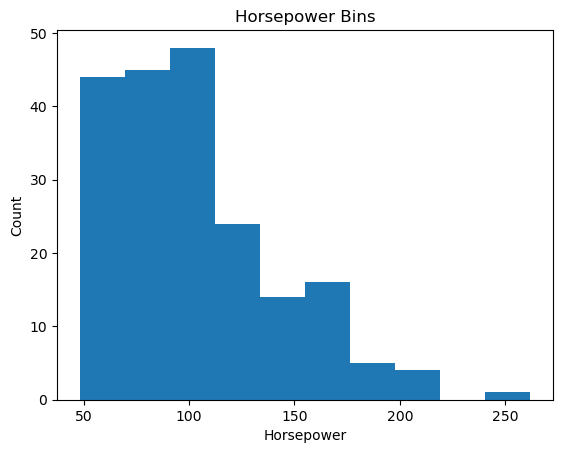

In [32]:
%matplotlib  inline
import matplotlib.pyplot as plt

plt.hist(df['horsepower'])

# Set the x and y label
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower Bins")


<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of horsepower we want to set start_value=min(df["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower we want to set end_value=max(df["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.</p>

We build a bin array, with a minimum value to a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins.

In [33]:
start_value = min(df["horsepower"])
end_value = max(df["horsepower"])
numbers_generated = 4
bins = np.linspace(start_value, end_value, numbers_generated)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

 We set group  names:

In [34]:
group_names = ['Low', 'Medium', 'High']

 We apply the function "cut" the determine what each value of "df['horsepower']" belongs to. 

In [35]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)
df[['horsepower','horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Lets see the number of vehicles in each bin.

In [36]:
df["horsepower-binned"].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

Lets plot the distribution of each bin.

Text(0.5, 1.0, 'Horsepower Bins')

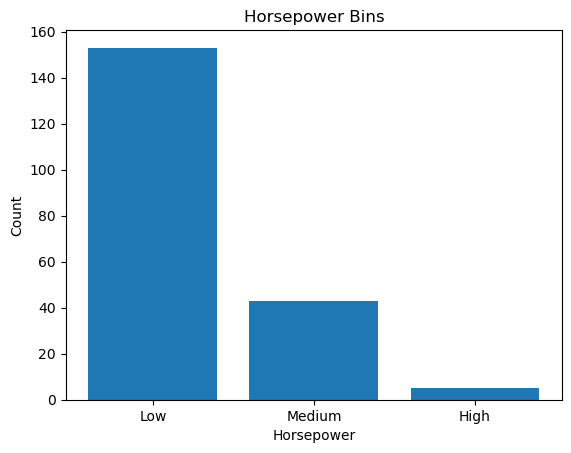

In [37]:
%matplotlib  inline

plt.bar(group_names, df["horsepower-binned"].value_counts())

plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower Bins")


<p>
    Check the dataframe above carefully, you will find the last column provides the bins for "horsepower" with 3 categories ("Low","Medium" and "High"). 
</p>
<p>
    We successfully narrow the intervals from 57 to 3.
</p>

<h3>Bins visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 

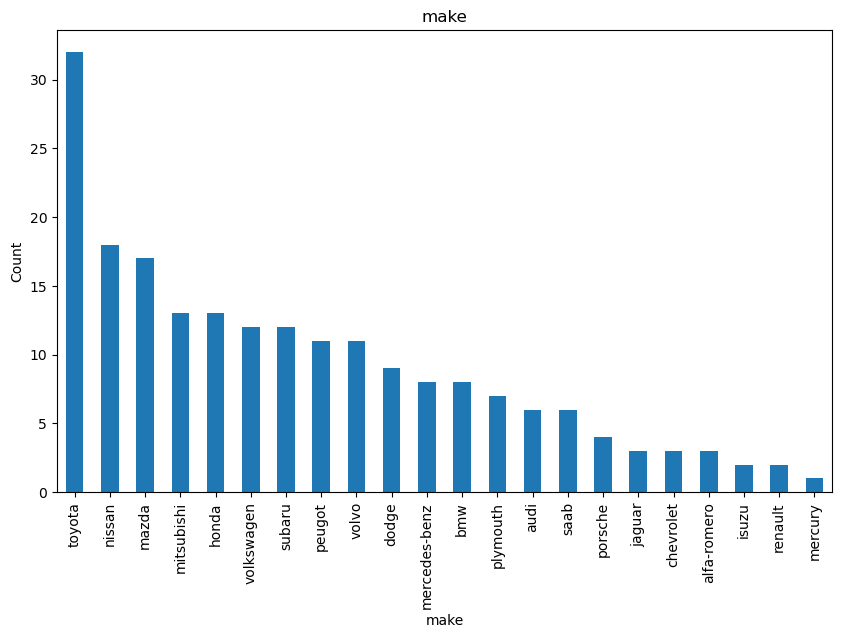

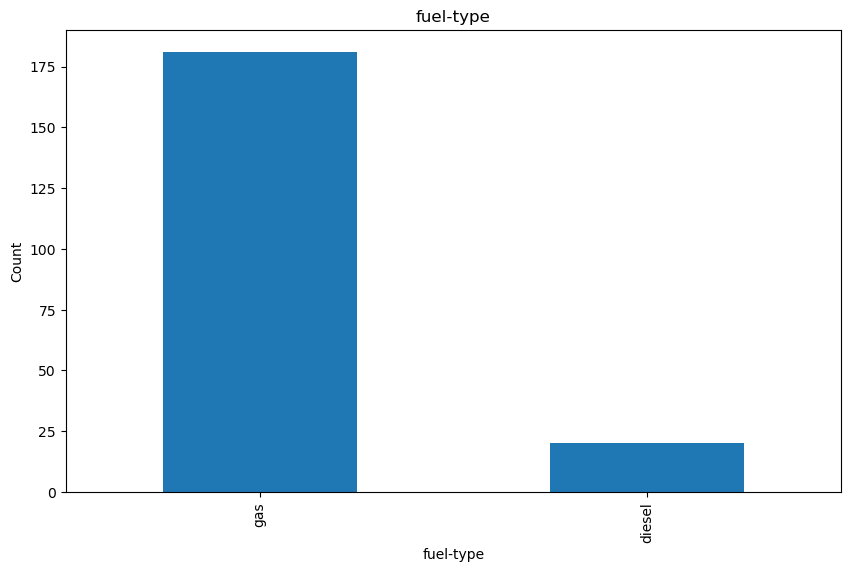

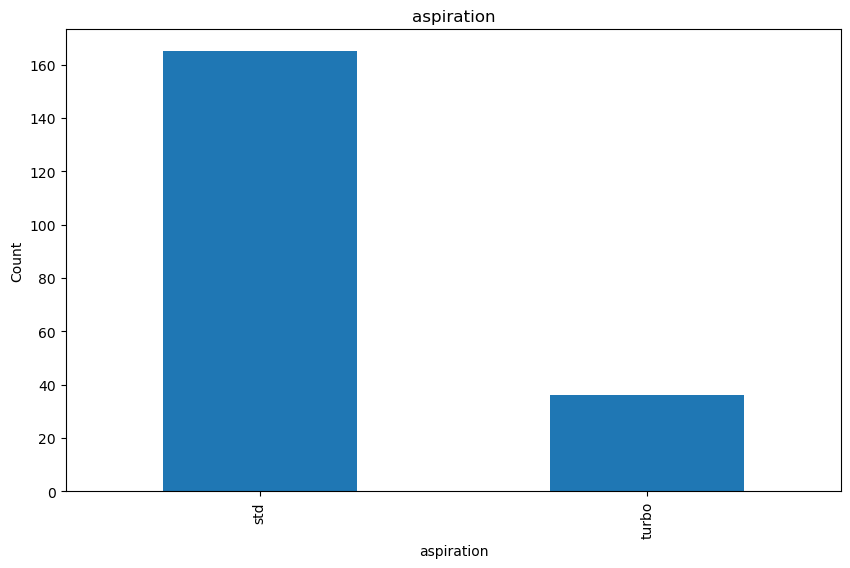

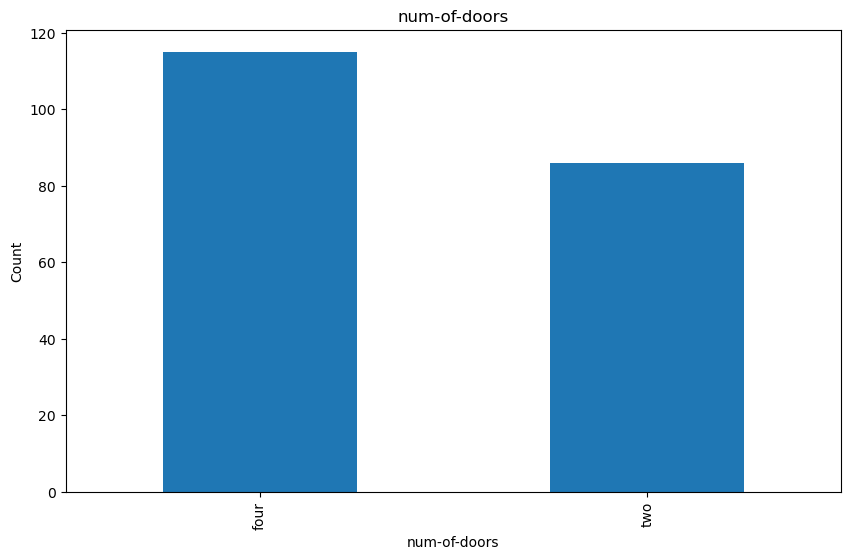

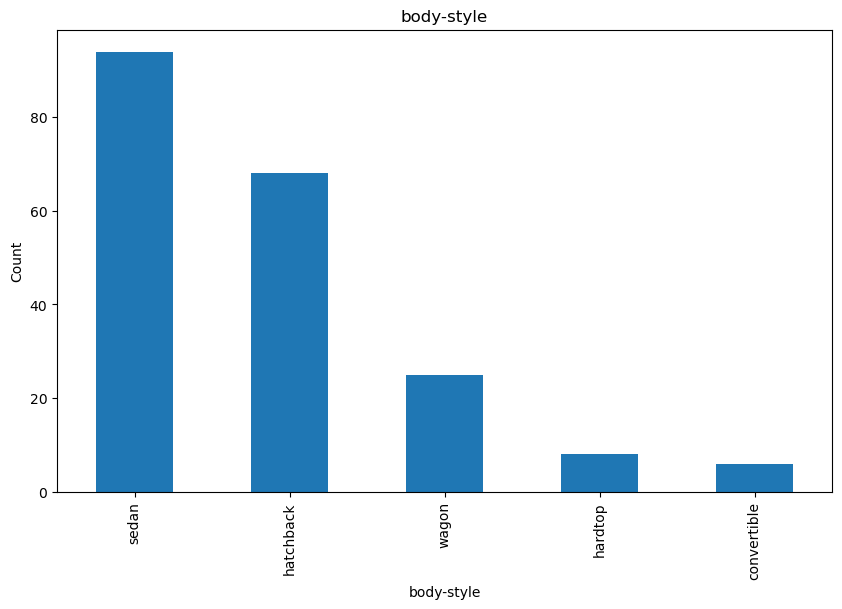

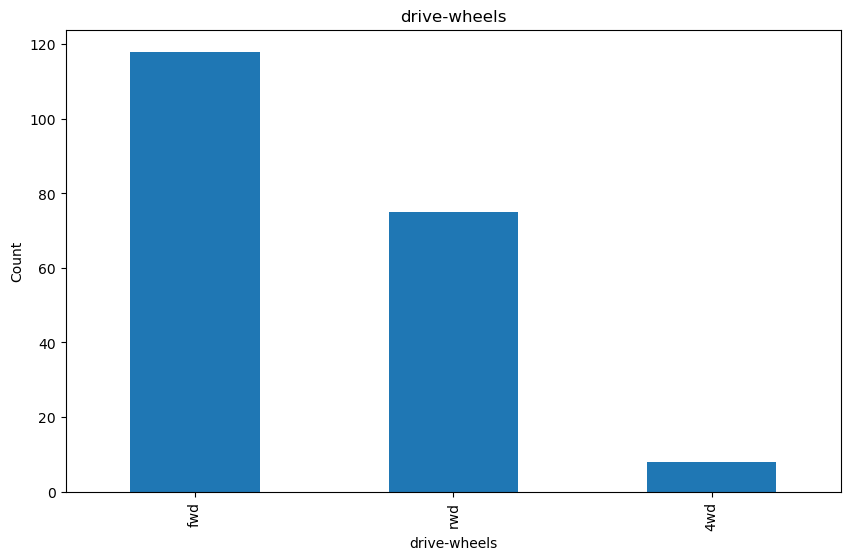

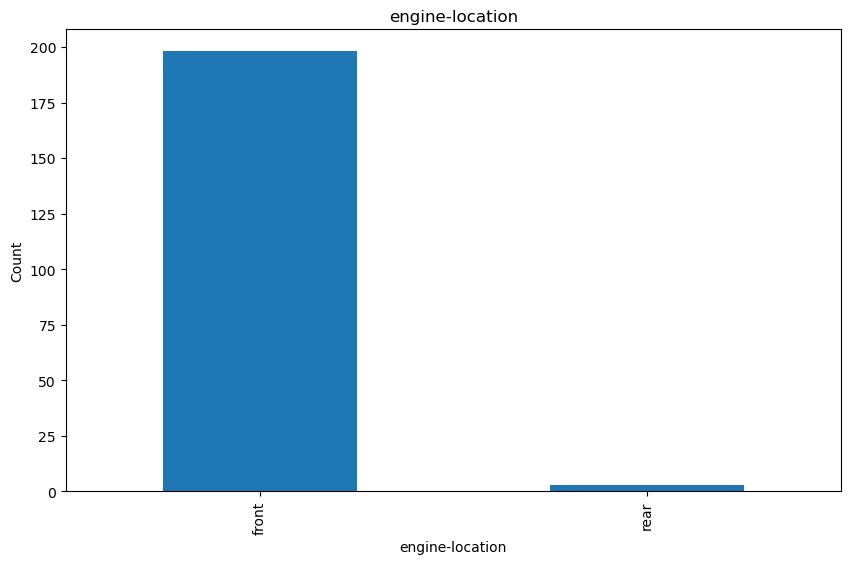

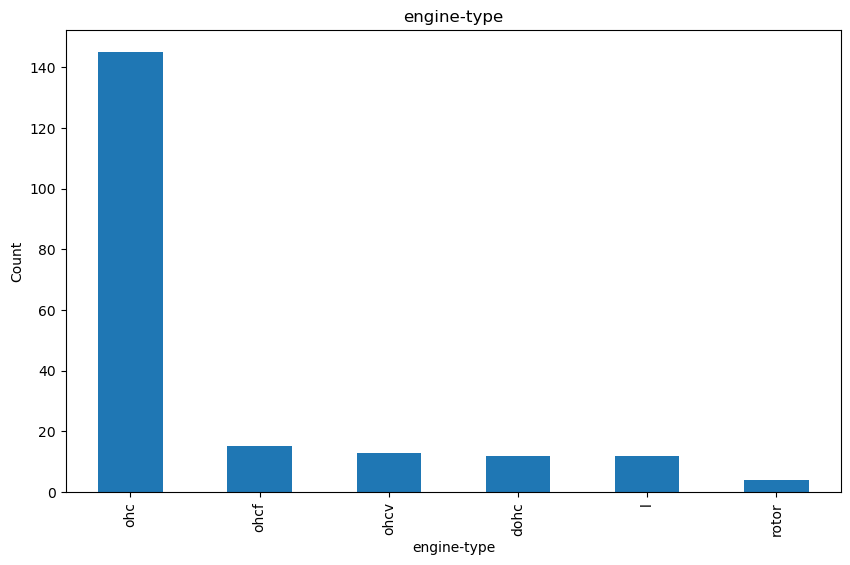

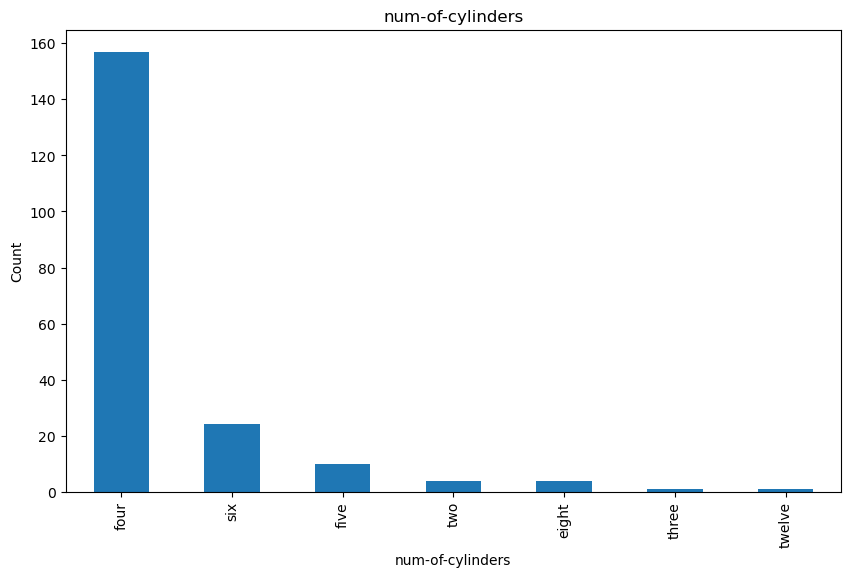

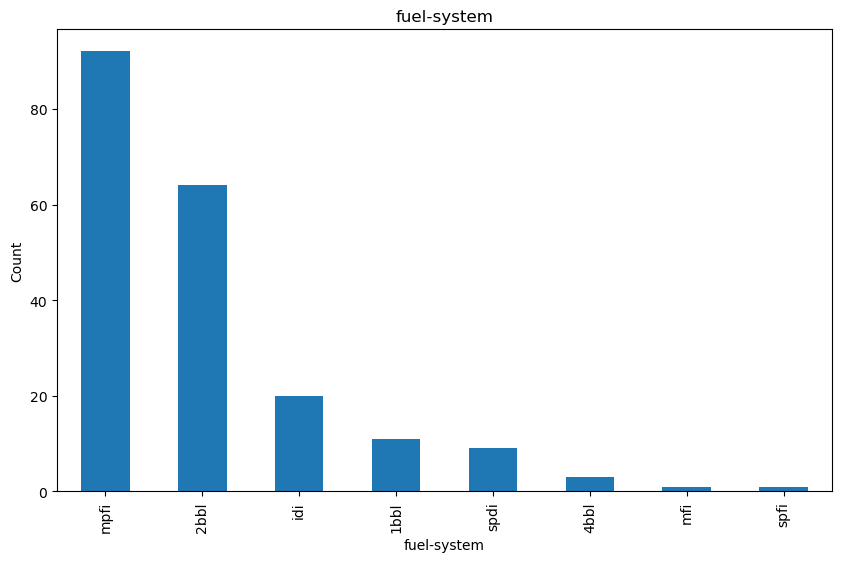

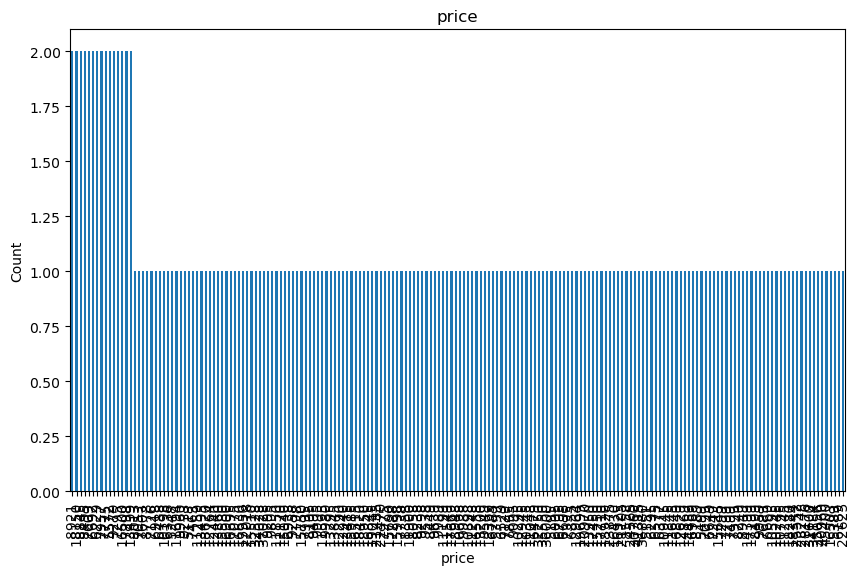

In [38]:
%matplotlib  inline

for column in df.columns:
    if df[column].dtype == object:
        df[column].value_counts().plot(kind="bar", figsize=(10, 6))
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.title(column)
        plt.show()
        

The plot above shows the binning result for attribute "horsepower". 

<h2 id="indicator">Indicator variable (or dummy variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>
<p>
    So we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.
</p>

<p>
    We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>

In [39]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L7100km', 'horsepower-binned'],
      dtype='object')

get indicator variables and assign it to data frame "dummy_variable_1" 

In [40]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"], dtype=int)
dummy_variable_1.head(10)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


change column names for clarity 

In [41]:
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)

We will now insert this column back into our original dataset. 

In [42]:
# Merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# Drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)
df.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L7100km,horsepower-binned,diesel,gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495,11.190476,Low,0,1
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500,11.190476,Low,0,1
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500,12.368421,Medium,0,1
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950,9.791667,Low,0,1
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450,13.055556,Low,0,1
5,2,122.0,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110,5500.0,19,9.400000,15250,12.368421,Low,0,1
6,1,158.0,audi,std,four,sedan,fwd,front,105.8,0.925997,...,8.5,110,5500.0,19,9.400000,17710,12.368421,Low,0,1
7,1,122.0,audi,std,four,wagon,fwd,front,105.8,0.925997,...,8.5,110,5500.0,19,9.400000,18920,12.368421,Low,0,1
8,1,158.0,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,8.3,140,5500.0,17,11.750000,23875,13.823529,Medium,0,1
9,2,192.0,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,8.8,101,5800.0,23,8.103448,16430,10.217391,Low,0,1


The last two columns are now the indicator variable representation of the fuel-type variable. It's all 0s and 1s now.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question Number 4: </h1>

<b>As above, create indicator variable to the column of "aspiration": "std" to 0, while "turbo" to 1.</b>
</div>

In [43]:
# Write your code below and press Shift + Enter to execute 

# Get indicator variables of aspiration and assign it to dataframe "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# Change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# Show first 5 instances of data frame "dummy_variable_2"
dummy_variable_2.head(10).astype(int)


,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1
9,1,0


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question Number 5: </h1>

<b>Merge the new dataframe to the original dataframe then drop the column 'aspiration'</b>
</div>

In [44]:
# Write your code below and press Shift + Enter to execute 

# Merge the new dataframe to the original dataframe
df = pd.concat([df, dummy_variable_2], axis=1)


# Drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)


# Show first 5 instances of dataframe "df"
df.head(10)


,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L7100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495,11.190476,Low,0,1,True,False
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500,11.190476,Low,0,1,True,False
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500,12.368421,Medium,0,1,True,False
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950,9.791667,Low,0,1,True,False
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450,13.055556,Low,0,1,True,False
5,2,122.0,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,5500.0,19,9.400000,15250,12.368421,Low,0,1,True,False
6,1,158.0,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,5500.0,19,9.400000,17710,12.368421,Low,0,1,True,False
7,1,122.0,audi,four,wagon,fwd,front,105.8,0.925997,0.991667,...,5500.0,19,9.400000,18920,12.368421,Low,0,1,True,False
8,1,158.0,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,5500.0,17,11.750000,23875,13.823529,Medium,0,1,False,True
9,2,192.0,bmw,two,sedan,rwd,front,101.2,0.849592,0.900000,...,5800.0,23,8.103448,16430,10.217391,Low,0,1,True,False


Save the new file as "clean_df.csv"

In [45]:
df.to_csv('clean_df.csv')

##### PREPARED BY: 
###### Dr. Robert G. de Luna, PECE

rgdeluna@pup.edu.ph,
robert.deluna.phd@gmail.com